<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Aufgabe 4.5 – Ableitungsfunktion

In dieser Aufgabe wird die numerische Berechnung der Ableitungsfunktion vorgestellt. Insbesondere wird die Berechnung der Werte am Rand und der Berechnungsfehler betrachtet.   

## Aufgabenstellung

Gegeben ist die Funktion $\sf y(x)$ mit

$$ \sf y(x) = e^{-(x-2)^2} $$

1. Stellen Sie die Funktion $\sf y$ und deren Ableitung $\sf y'$ graphisch im Intervall $\sf x \in [0,4]$ dar.
2. Diskretisieren Sie die das obige Intervall, z.B. mit 20 Stützstellen, und bestimmen sie numerisch die Ableitungsfunktion. Für Stützstellen, welche nicht am Rand liegen, verwenden Sie die zentrale Differenzenformel zweiter Ordnung. Die Randwerte werden mit den Vorwärtsdifferenzenquotienten
$$ \sf y'_i = \frac{y_{i+1} - y_i}{\Delta x} $$
bzw. mit dem Rückwärtsdifferenzentquotienten 
$$ \sf y'_i = \frac{y_{i} - y_{i-1}}{\Delta x} $$
jeweils erster Ordnung berechnet. Stellen Sie die analytisch und numerisch bestimmten Ableitungsfunktionen zusammen dar.
3. Berechnen Sie die Abweichung zwischen der analytischen und numerischen Ableitung an jedem Stützpunkt und stellen Sie diese graphisch dar. Verkleinern Sie den Gitterabstand $\sf \Delta x$, z.B. um einen Faktor 4. Was fällt Ihnen auf?
4. Bestimmen Sie die Formel für den Vorwärtsdifferenzenquotienten zweiter Ordnung zur Berechnung der ersten Ableitung. Verwenden Sie dafür die Taylor-Entwicklung an drei Punkten, d.h. $\sf i, i+1, i+2$. Die Rückwartsformel lautet
$$ \sf y'_i = \frac{3y_{i-2} - 4y_{i-1} + y{i}}{2\Delta x} $$
5. Verwenden Sie die Formeln zweiter Ordnung für die Berechnung der Ableitung am Rand. Wie sieht nun die Abweichung zwischen der analytischen und numerischen Ableitung aus? 

### Lösungshinweis

Die Ausgaben der jeweiligen Aufgabenteile könnten wie folgt aussehen.

**Teil 1**

![](teil1.pdf)

**Teil 2**

![](teil2.pdf)

**Teil 3**

![](teil3a.pdf)

![](teil3b.pdf)

**Teil 4**

![](teil4.pdf)

### Lösungsvorschlag

In [1]:
import numpy as np
import matplotlib.pyplot as plt

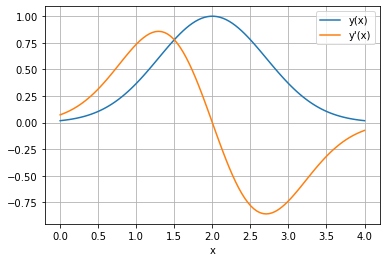

In [62]:
x = np.linspace(0, 4, 100)
y = np.exp(-(x-2)**2)
yp = - (2*x - 4) * np.exp(-(x-2)**2)

plt.plot(x, y, label='y(x)')
plt.plot(x, yp, label='y\'(x)')
plt.xlabel('x')
plt.grid()
plt.legend()
# plt.savefig('teil1.pdf');

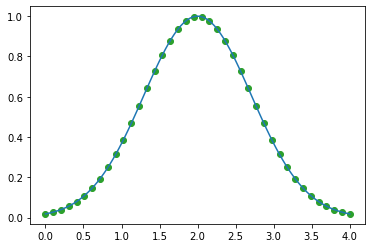

In [73]:
nx = 20
xi = np.linspace(0, 4, nx)
yi = np.exp(-(xi-2)**2)
dx = xi[1] - xi[0]

plt.scatter(xi, yi, c='C2')
plt.plot(x, y)

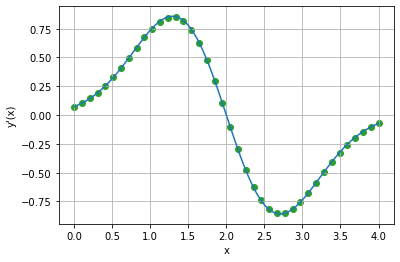

In [76]:
yip = np.zeros_like(yi)
yip[1:-1] = (yi[2:] - yi[:-2]) / (2*dx)

yip[0] = (yi[1] - yi[0]) / dx
yip[-1] = (yi[-1] - yi[-2]) / dx

yip[0] = (-3*yi[0] + 4*yi[1] - yi[2]) / (2*dx)
yip[-1] = (3*yi[-1] - 4*yi[-2] + yi[-3]) / (2*dx)

plt.plot(x,yp)
plt.scatter(xi, yip, c='C2')

plt.ylabel('y\'(x)')
plt.xlabel('x')
plt.grid()
# plt.savefig('teil2.pdf');

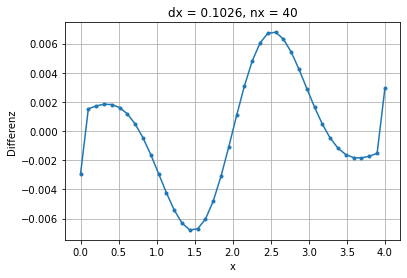

In [77]:
yip_exakt = -(2*xi - 4) * np.exp(-(xi-2)**2)
plt.plot(xi, yip - yip_exakt, marker='.')
# L2 = np.sqrt(np.sum((yip - yip_exakt)**2)) / nx
# plt.title(f"L2={L2:.2e}")

plt.title(f'dx = {dx:.4}, nx = {nx}')
plt.ylabel('Differenz')
plt.xlabel('x')
plt.grid()
# plt.savefig('teil4.pdf');